In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
"""Average Path Length (L) = exp(ln(Number of Nodes(N))/Average Degree(K))"""
# Define the desired average path length
target_average_path_length = 2.3

# Initialize β with an initial value
beta = 0

# Set the learning rate (step size)
learning_rate = 0.1

# Set the convergence threshold
convergence_threshold = 0.001

# Generate the initial Watts-Strogatz graph
N = 100  # Number of nodes
K = 10   # Average degree
graph = nx.watts_strogatz_graph(N, K, beta)

# Calculate the initial average path length
initial_average_path_length = nx.average_shortest_path_length(graph)

# Optimization loop
iteration = 0
while abs(initial_average_path_length - target_average_path_length) > convergence_threshold:
    iteration += 1

    # Calculate the gradient
    num_nodes = len(graph.nodes)
    gradient = 2 * (initial_average_path_length - target_average_path_length) / (num_nodes * (num_nodes - 1))

    # Update β using the gradient descent update rule
    beta += learning_rate * gradient

    # Generate a new Watts-Strogatz graph using the updated β
    graph = nx.watts_strogatz_graph(N, K, beta)

    # Calculate the new average path length
    new_average_path_length = nx.average_shortest_path_length(graph)

    # Check for convergence
    if abs(new_average_path_length - target_average_path_length) < convergence_threshold:
        break

    # Print the current iteration and β value
    print(f"Iteration: {iteration}, β: {beta}, Average Path Length: {new_average_path_length}")

# Print the final β value and average path length
print("\nOptimization Complete!")
print(f"Final β: {beta}")
print(f"Final Average Path Length: {new_average_path_length}")

Iteration: 1, β: 6.372819100091827e-05, Average Path Length: 5.454545454545454
Iteration: 2, β: 0.00012745638200183654, Average Path Length: 5.454545454545454
Iteration: 3, β: 0.00019118457300275481, Average Path Length: 5.454545454545454
Iteration: 4, β: 0.0002549127640036731, Average Path Length: 5.454545454545454
Iteration: 5, β: 0.0003186409550045914, Average Path Length: 4.8557575757575755
Iteration: 6, β: 0.0003823691460055097, Average Path Length: 5.454545454545454
Iteration: 7, β: 0.000446097337006428, Average Path Length: 5.454545454545454
Iteration: 8, β: 0.0005098255280073463, Average Path Length: 4.700404040404041
Iteration: 9, β: 0.0005735537190082646, Average Path Length: 4.66949494949495
Iteration: 10, β: 0.0006372819100091829, Average Path Length: 5.454545454545454
Iteration: 11, β: 0.0007010101010101012, Average Path Length: 5.454545454545454
Iteration: 12, β: 0.0007647382920110195, Average Path Length: 4.667676767676768
Iteration: 13, β: 0.0008284664830119378, Average

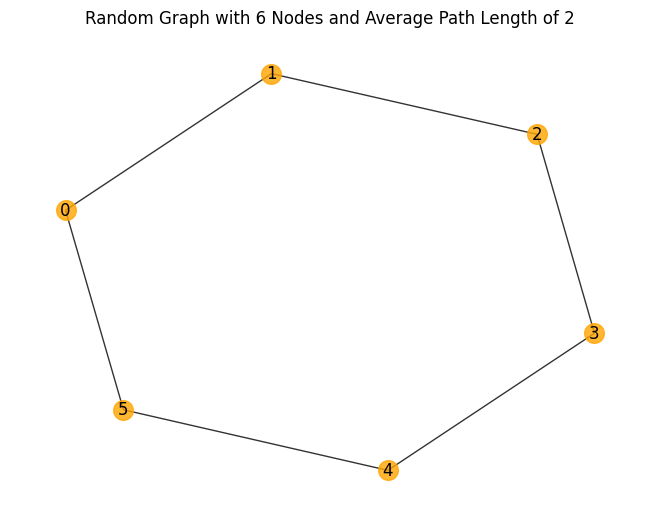

In [12]:
graph = nx.watts_strogatz_graph(num_nodes, k=int(new_average_path_length), p=0.2)

# Draw the graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos, node_size=200, alpha=0.8, node_color='orange')

# Label the nodes with their IDs
labels = {node: str(node) for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos=pos, labels=labels, font_size=12)

plt.axis('off')
plt.title('Random Graph with %d Nodes and Average Path Length of %d' % (num_nodes, new_average_path_length))
plt.show()